In [1]:
# Instalando pacotes necessários para ler pdf e tokenizar texto
!pip install PyPDF2
!pip install nltk

     -------------------------------------- 232.6/232.6 kB 1.4 MB/s eta 0:00:00


In [2]:
# Baixando as stopwords e o tokenizador
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gustavo.ferreira\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gustavo.ferreira\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [5]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import PyPDF2

# Criando função para extrair o texto do pdf
def extract_text_from_pdf(pdf_path):
    with open(pdf_path, 'rb') as file:
        pdf_reader = PyPDF2.PdfReader(file)
        text = ''
        for page_num in range(len(pdf_reader.pages)):
            page = pdf_reader.pages[page_num]
            text += page.extract_text()
    return text

# Criando função para tokenizar texto e retirar as stopwords (a, e , pois, etc)
def process_text(text):
    # Realizando a Tokenização das palavras no texto
    words = word_tokenize(text)
    # Remoção de stopwords (palavras comuns que geralmente não contribuem para a análise)
    stop_words = set(stopwords.words('portuguese'))
    filtered_words = [word.lower() for word in words if word.isalnum() and word.lower() not in stop_words]
    return filtered_words

# Criando função para identificar e plotar frequencia das palavras mais utilizadas no texto
def plot_freq_distribution(words):
    # Cria uma distribuição de frequência
    freq_dist = FreqDist(words)
    # Plota o gráfico de barras da distribuição de frequência
    freq_dist.plot(30, cumulative=False)
    plt.show()

# Criando função main() para consolidar passo a passo do PLN
def main():
    # Substitua 'caminho_para_seu_arquivo.pdf' pelo caminho do seu arquivo PDF
    pdf_path = 'Brainstorm.pdf'

    # Extrai o texto do arquivo PDF usando OCR
    pdf_text = extract_text_from_pdf(pdf_path)

    # Processa o texto
    processed_words = process_text(pdf_text)

    # Plota a distribuição de frequência
    plot_freq_distribution(processed_words)

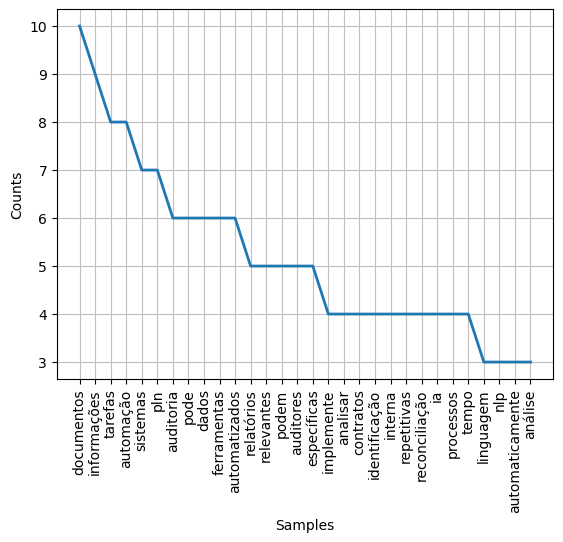

In [6]:
if __name__ == "__main__":
    main()